In [97]:
# dependencides 
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
warnings.filterwarnings("ignore")   # Suppress all warnings

In [73]:
# dataset, only with data of interest
df = pd.read_csv(r"C:\Users\Adele\Downloads\data of interest - DPIC Execution Database - U.S. Executions (1) (1).csv")

#converting 'yes' and 'no' into 1 and 0
df['Volunteered'] = df['Execution Volunteer'].map({'no': 0, 'yes': 1})
df.head(9)

,Execution Volunteer,Number of Victims,Volunteered
0,yes,1,1
1,no,1,0
2,yes,1,1
3,yes,4,1
4,yes,1,1
5,no,1,0
6,no,1,0
7,no,1,0
8,no,1,0


In [75]:
# Split the data into training and testing sets
X = df[['Number of Victims']]
y = df['Volunteered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Initialize the models
logistic_model = LogisticRegression()

# Train the models
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [79]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

## Custom function to evaluate each model and its metrics (taken from given logistic regression notebook) :
def evaluate_model(y_true, y_pred, model, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"{model_name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("\nConfusion Matrix:\n")
    
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No", "Yes"])

Logistic Regression - Evaluation Metrics:
Accuracy: 0.89
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC Score: 0.50

Confusion Matrix:



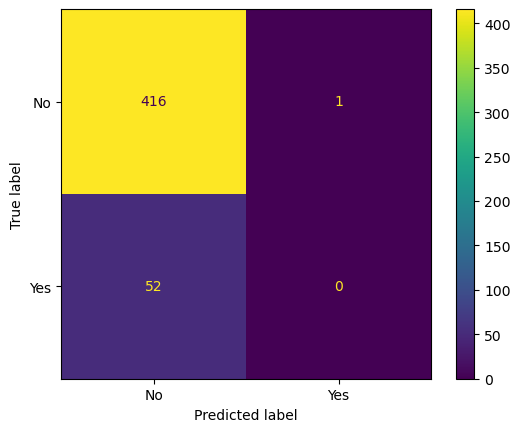

In [95]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logistic, logistic_model, model_name="Logistic Regression")
